In [1]:
# Load packages
import pandas as pd
import nltk

In [2]:
# Import the text from Moby Dick and Hamlet
text_mobydick = nltk.corpus.gutenberg.raw("melville-moby_dick.txt")

In [5]:
# Split the text into tokens
tokens_mobydick = nltk.word_tokenize(text_mobydick)

In [3]:
# Split the text into sentences
sent_mobydick = nltk.sent_tokenize(text_mobydick)

In [7]:
# Print how many words and sentences there are
print("Moby Dick | # Tokens = ", len(tokens_mobydick), " | # Sentences = ", len(sent_mobydick))

Moby Dick | # Tokens =  255028  | # Sentences =  9852


In [9]:
# Define the grammar for an adjective phrase
adjp_grammar = """
ADJP: {<JJ><NN>}
      {<NN><JJ>}
"""

# Define the grammar for an adverb phrase
advp_grammar = """
ADVP: {<RB><V>}
      {<RB><NN>}
      {<RB><JJ>}
"""

In [10]:
# Define a function for retrieving phrases
def get_phrase(sentence, pattern, phrase):
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)
    parser = nltk.RegexpParser(pattern)
    tree = parser.parse(tags)
    for sub1 in tree.subtrees():
        for sub2 in sub1:
            if type(sub2) != tuple:
                extract = ""
                for sub3 in sub2.leaves():
                    extract += " " + str(sub3[0])
                return extract

In [11]:
# Iterate through the sentences and retrieve the adj phrases
adj_phrases = []
adv_phrases = []
for sentence in sent_mobydick:
    try:
        adj_phrase = get_phrase(sentence, adjp_grammar, "ADJP")
        adv_phrase = get_phrase(sentence, advp_grammar, "ADVP")
        adj_phrases.append(adj_phrase)
        adv_phrases.append(adv_phrase)
    except:
        adj_phrases.append(None)
        adv_phrases.append(None)

In [12]:
# Put together a dataframe of the sentence, phrase, and test
mobydick_df = pd.DataFrame(list(zip(
    sent_mobydick,
    adj_phrases,
    adv_phrases)),
    columns = ["Sentence", "AdjPhrase", "AdvPhrase"]
)

In [13]:
# Print out some of the dataframe
mobydick_df.head(50)

,Sentence,AdjPhrase,AdvPhrase
0,[Moby Dick by Herman Melville 1851]\r\n\r\n\r\...,None,None
1,(Supplied by a Late Consumptive Usher to a Gra...,None,None
2,He was ever dusting his old lexicons and gramm...,None,None
3,He loved to dust his old grammars; it\r\nsomeh...,None,None
4,"""While you take in hand to school others, and ...",None,not true
5,"--HACKLUYT\r\n\r\n""WHALE.",None,None
6,... Sw. and Dan.,None,None
7,HVAL.,None,None
8,This animal is named from roundness\r\nor roll...,None,None
9,"HVALT is arched or vaulted.""",None,None


In [16]:
# Print out some examples of adjective phrases
for adj_phrase in list(mobydick_df["AdjPhrase"])[0:200]:
    if adj_phrase: print(adj_phrase)

 poor devil
 higgledy-piggledy whale
 fare thee
 unpleasant sadness
 great fish
 strong sword
 great swallow
 monstrous size
 great value
 own country
 dreadful gulf
 noble prophet
 monstrous bulk
 incredible quantity
 inward bruise
 lowly dart
 peaceful calm
 modern flail
 artificial man
 promontory sleeps
 great deal
 first discoverer
 whale-bone kind
 Sperma-ceti whale
 insupportable smell
 chosen sylphs
 seven-fold fence
 dead whale
 great dread
 fierce animal
 great whale
 tenth branch
 barbed steel
 momentary fire
 unwieldy joy
 immense velocity
 main pipe
 mammiferous animal
 free element
 high hill
 first love
 raal oil-butt


In [321]:
# Print out some examples of adverb phrases
for adv_phrase in list(mobydick_df["AdvPhrase"])[0:200]:
    if adv_phrase: print(adv_phrase)

 not true
 however authentic
 solely valuable
 So fare
 too rosy-strong
 so much
 ye strike
 very great
 So close
 also abundance
 so great
 So fire


In [14]:
# How many sentences with adjective phrases were there?
sum([phrase != None for phrase in list(mobydick_df["AdjPhrase"])])

4418

In [15]:
# How many sentences with adverb phrases were there?
sum([phrase != None for phrase in list(mobydick_df["AdvPhrase"])])

1320

                0
count  4418.00000
mean    192.52603
std     136.89557
min       9.00000
25%     101.00000
50%     163.00000
75%     249.00000
max    2809.00000 



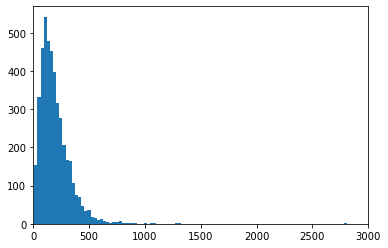

In [17]:
# Show a distribution of the length of sentences with an adjective phrase
import matplotlib.pyplot as plt
sentences = list(mobydick_df[mobydick_df["AdjPhrase"].notnull()].Sentence)
print(pd.DataFrame([len(sentence) for sentence in sentences]).describe(), "\n")
plt.hist([len(sentence) for sentence in sentences], bins = 100)
plt.xlim(xmin = 0, xmax = 3000)
plt.show()

                 0
count  5434.000000
mean     67.660655
std      63.818965
min       2.000000
25%      22.000000
50%      46.000000
75%      96.000000
max     586.000000 



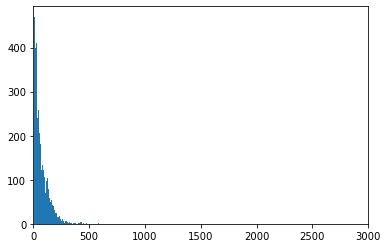

In [18]:
# Show a distribution of the length of sentences without an adjective phrase
import matplotlib.pyplot as plt
sentences = list(mobydick_df[mobydick_df["AdjPhrase"].isnull()].Sentence)
print(pd.DataFrame([len(sentence) for sentence in sentences]).describe(), "\n")
plt.hist([len(sentence) for sentence in sentences], bins = 100)
plt.xlim(xmin = 0, xmax = 3000)
plt.show()

                 0
count  1320.000000
mean    222.847727
std     160.521422
min      11.000000
25%     114.000000
50%     182.000000
75%     295.000000
max    1318.000000 



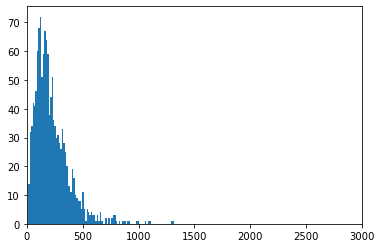

In [19]:
# Show a distribution of the length of sentences with an adverb phrase
import matplotlib.pyplot as plt
sentences = list(mobydick_df[mobydick_df["AdvPhrase"].notnull()].Sentence)
print(pd.DataFrame([len(sentence) for sentence in sentences]).describe(), "\n")
plt.hist([len(sentence) for sentence in sentences], bins = 100)
plt.xlim(xmin = 0, xmax = 3000)
plt.show()

                 0
count  8532.000000
mean    108.308603
std     104.921301
min       2.000000
25%      32.000000
50%      79.000000
75%     152.000000
max    2809.000000 



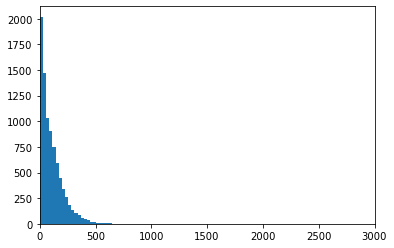

In [20]:
# Show a distribution of the length of sentences without an adverb phrase
import matplotlib.pyplot as plt
sentences = list(mobydick_df[mobydick_df["AdvPhrase"].isnull()].Sentence)
print(pd.DataFrame([len(sentence) for sentence in sentences]).describe(), "\n")
plt.hist([len(sentence) for sentence in sentences], bins = 100)
plt.xlim(xmin = 0, xmax = 3000)
plt.show()

In [24]:
# Create a frequency distribution of adjective phrases and print out the top 50
fdist = nltk.FreqDist(list(mobydick_df[mobydick_df["AdjPhrase"].notnull()].AdjPhrase))
for pair in fdist.most_common(50): print(pair)

(' old man', 53)
(' sperm whale', 27)
(' white whale', 17)
(' young man', 10)
(' chief mate', 10)
(' first place', 9)
(' first time', 9)
(' same time', 8)
(' other side', 8)
(' other way', 7)
(' present day', 7)
(' right whale', 7)
(' good time', 7)
(" old man's", 6)
(' same instant', 6)
(' poor fellow', 6)
(' general thing', 6)
(' same way', 5)
(' long time', 5)
(' thou art', 5)
(' last night', 5)
(' whale fishery', 5)
(' mortal man', 5)
(' dead whale', 4)
(' great whale', 4)
(' whaling voyage', 4)
(' next morning', 4)
(' small degree', 4)
(' old woman', 4)
(' Next morning', 4)
(' next day', 4)
(' second mate', 4)
(' white water', 4)
(' other whale', 4)
(' upper part', 4)
(' present case', 4)
(' stricken whale', 4)
(' poor devil', 3)
(' last day', 3)
(' young fellow', 3)
(' full ship', 3)
(' little plan', 3)
(' good deal', 3)
(' high time', 3)
(' next moment', 3)
(' past night', 3)
(' first glimpse', 3)
(' poor lad', 3)
(' present time', 3)
(' proper place', 3)


In [25]:
# Create a frequency distribution of adverb phrases and print out the top 50
fdist = nltk.FreqDist(list(mobydick_df[mobydick_df["AdvPhrase"].notnull()].AdvPhrase))
for pair in fdist.most_common(50): print(pair)

(' so much', 35)
(' so many', 14)
(' too much', 10)
(' as much', 8)
(' never mind', 7)
(' very large', 6)
(' so nigh', 6)
(' too late', 4)
(' so wide', 4)
(' so good', 4)
(' very little', 4)
(' as good', 4)
(' so saying', 4)
(' not much', 4)
(' very many', 4)
(' very curious', 4)
(' very much', 4)
(' so great', 3)
(' still stranger', 3)
(' very similar', 3)
(' far distant', 3)
(' ever such', 3)
(' Very good', 3)
(' so remarkable', 3)
(' so small', 3)
(' so strange', 3)
(' so easy', 3)
(' very act', 3)
(' very few', 3)
(' far other', 3)
(' very learned', 3)
(' not true', 2)
(' very great', 2)
(' ever heard', 2)
(' still further', 2)
(' too many', 2)
(' very reason', 2)
(' as cool', 2)
(' never heard', 2)
(' somewhat similar', 2)
(' only alive', 2)
(' so outlandish', 2)
(' very old', 2)
(' so intense', 2)
(' so prolonged', 2)
(' very convenient', 2)
(' very point', 2)
(' not something', 2)
(' well nigh', 2)
(' uncommonly heedful', 2)
